In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm

In [2]:
rb_df2 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01952/HG01952_rbDF2_Kmode.csv").set_index("Alu")
rb_df2

,RepeatBlock,Lengths,Group,Block_Size,KMode_cluster
Alu,,,,,
C_AluY_1882515-1882806,0,2217,['45240 374 23.9 3.7 3.7 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1
C_AluY_1884937-1885225,0,2411,['45243 384 18.9 9.1 3.0 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1
C_AluY_1887352-1887643,0,2411,['45246 407 24.3 3.9 3.8 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1
C_AluY_1889761-1890048,0,2402,['45249 379 26.9 2.9 3.9 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1
C_AluY_1892175-1892463,0,2404,['45252 358 20.7 8.6 3.0 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1
...,...,...,...,...,...
+_AluSx_23141892-23142220,26,551,['63707 2114 13.0 0.7 0.0 chrY.21-24.01.AMPL7-...,<999,GraveYard
+_AluJb_23143348-23143498,26,1012,['63709 18 21.8 0.0 0.0 chrY.21-24.01.AMPL7-PA...,1000-1999,GraveYard
+_AluSp_23143499-23143796,26,298,['63711 2101 12.8 0.7 0.3 chrY.21-24.01.AMPL7-...,<999,GraveYard


In [3]:
rb_df2.iloc[0]['Group']

"['45240 374 23.9 3.7 3.7 chrY.21-24.01.AMPL7-PAR2.FW.utig4-9605.HG01952 1881158 1882514 21598351 False (ATATAAT)n Simple_repeat 1 1357 0 34686 False', '45241 1366 19.9 0.0 5.4 chrY.21-24.01.AMPL7-PAR2.FW.utig4-9605.HG01952 1882515 1882806 21598059 True AluY SINE/Alu 12 289 13 34687 True', '45242 3990 9.5 0.0 0.2 chrY.21-24.01.AMPL7-PAR2.FW.utig4-9605.HG01952 1882806 1883374 21597491 True HSATI Satellite 0 568 1 34688 False']"

In [4]:
import ast
AluCoordinateDict={}
for row in rb_df2.index:
    AluCoordinateDict[str(ast.literal_eval(rb_df2.at[row,'Group'])[-1].split(" ")[5].split(".utig4-9605.")[1])+":"+str(ast.literal_eval(rb_df2.at[row,'Group'])[0].split(" ")[6])+"-"+str(ast.literal_eval(rb_df2.at[row,'Group'])[-1].split(" ")[7])]= row

In [5]:
AluCoordinateDict

{'HG01952:1881158-1883374': 'C_AluY_1882515-1882806',
 'HG01952:1883382-1885792': 'C_AluY_1884937-1885225',
 'HG01952:1885800-1888210': 'C_AluY_1887352-1887643',
 'HG01952:1888218-1890619': 'C_AluY_1889761-1890048',
 'HG01952:1890627-1893030': 'C_AluY_1892175-1892463',
 'HG01952:1893031-1895448': 'C_AluY_1894591-1894881',
 'HG01952:1895456-1897864': 'C_AluY_1897006-1897293',
 'HG01952:1897873-1901276': 'C_AluY_1899422-1899684',
 'HG01952:1901290-1903687': '+_AluY_1901851-1902142',
 'HG01952:1903695-1906100': '+_AluY_1904262-1904553',
 'HG01952:1906108-1908507': '+_AluY_1906675-1906966',
 'HG01952:1908526-1910933': '+_AluY_1909093-1909385',
 'HG01952:1910941-1913330': '+_AluY_1911507-1911799',
 'HG01952:1913338-1914892': '+_AluY_1913905-1914196',
 'HG01952:2503810-2506222': '+_AluY_2504377-2504668',
 'HG01952:2506230-2508640': '+_AluY_2506797-2507088',
 'HG01952:2508648-2511059': '+_AluY_2509215-2509506',
 'HG01952:2511067-2513479': '+_AluY_2511634-2511925',
 'HG01952:2513487-2515898': 

In [6]:
AluDict = {x:'temp' for x in rb_df2.index}
for alu in AluDict:
    if  rb_df2.loc[alu]['KMode_cluster'] == 'GraveYard':
        AluDict[alu]='black'
    else:
        AluDict[alu]= rb_df2.loc[alu]['KMode_cluster']

AluDict

{'C_AluY_1882515-1882806': '#4169e1',
 'C_AluY_1884937-1885225': '#4169e1',
 'C_AluY_1887352-1887643': '#4169e1',
 'C_AluY_1889761-1890048': '#4169e1',
 'C_AluY_1892175-1892463': '#4169e1',
 'C_AluY_1894591-1894881': '#4169e1',
 'C_AluY_1897006-1897293': '#4169e1',
 'C_AluY_1899422-1899684': '#4169e1',
 '+_AluY_1901851-1902142': '#4169e1',
 '+_AluY_1904262-1904553': '#4169e1',
 '+_AluY_1906675-1906966': '#4169e1',
 '+_AluY_1909093-1909385': '#4169e1',
 '+_AluY_1911507-1911799': '#4169e1',
 '+_AluY_1913905-1914196': '#4169e1',
 '+_AluY_2504377-2504668': '#4169e1',
 '+_AluY_2506797-2507088': '#4169e1',
 '+_AluY_2509215-2509506': '#F6C324',
 '+_AluY_2511634-2511925': '#4169e1',
 '+_AluY_2514054-2514344': '#4169e1',
 '+_AluY_2516473-2516764': '#F6C324',
 '+_AluY_2518893-2519184': '#F6C324',
 '+_AluY_2521324-2521615': '#4169e1',
 '+_AluY_2523742-2524033': '#4169e1',
 '+_AluY_2526160-2526451': '#4169e1',
 '+_AluY_2528578-2528869': '#4169e1',
 '+_AluY_2530996-2531287': '#4169e1',
 '+_AluY_253

In [7]:
AluDict2={}
for x,y in AluDict.items():
    if y == 'black':
        continue
    else:
        AluDict2[x]=0.0

In [8]:
allSamplesDF = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/AllSamples_nonDYZ_AluBlocks.csv").set_index("Alu")
ASDF = allSamplesDF[allSamplesDF['SampleName']=='HG01952'].copy()
ASDF

,RepeatBlock,Lengths,Group,Block_Size,SampleName,Divergence
Alu,,,,,,
C_AluY_1899422-1899684,0,3404,['45261 296 27.6 5.4 3.1 chrY.21-24.01.AMPL7-P...,3000-3999,HG01952,20.6
C_AluY_6834634-6834964,6,760,['48560 2317 2.9 0.1 0.1 chrY.21-24.01.AMPL7-P...,<999,HG01952,2.9
C_AluY_11897822-11898113,10,2980,['53717 417 24.3 3.9 3.6 chrY.21-24.01.AMPL7-P...,2000-2999,HG01952,18.5
C_AluY_11899246-11899537,10,859,['53720 1443 18.8 0.0 5.4 chrY.21-24.01.AMPL7-...,<999,HG01952,18.8
C_AluY_11904083-11904374,10,2978,['53725 417 24.3 3.9 3.6 chrY.21-24.01.AMPL7-P...,2000-2999,HG01952,18.5
C_AluY_11905505-11905796,10,859,['53728 1432 18.8 0.0 5.4 chrY.21-24.01.AMPL7-...,<999,HG01952,18.8
C_AluY_11915177-11915468,10,2978,['53739 378 19.9 8.7 2.9 chrY.21-24.01.AMPL7-P...,2000-2999,HG01952,18.5
C_AluY_11916601-11916892,10,859,['53742 1432 18.8 0.0 5.4 chrY.21-24.01.AMPL7-...,<999,HG01952,18.8
+_AluY_16280094-16280359,15,1036,['57554 175 21.8 4.6 4.2 chrY.21-24.01.AMPL7-P...,1000-1999,HG01952,0.8


In [9]:
AluDict2

{'C_AluY_1882515-1882806': 0.0,
 'C_AluY_1884937-1885225': 0.0,
 'C_AluY_1887352-1887643': 0.0,
 'C_AluY_1889761-1890048': 0.0,
 'C_AluY_1892175-1892463': 0.0,
 'C_AluY_1894591-1894881': 0.0,
 'C_AluY_1897006-1897293': 0.0,
 'C_AluY_1899422-1899684': 0.0,
 '+_AluY_1901851-1902142': 0.0,
 '+_AluY_1904262-1904553': 0.0,
 '+_AluY_1906675-1906966': 0.0,
 '+_AluY_1909093-1909385': 0.0,
 '+_AluY_1911507-1911799': 0.0,
 '+_AluY_1913905-1914196': 0.0,
 '+_AluY_2504377-2504668': 0.0,
 '+_AluY_2506797-2507088': 0.0,
 '+_AluY_2509215-2509506': 0.0,
 '+_AluY_2511634-2511925': 0.0,
 '+_AluY_2514054-2514344': 0.0,
 '+_AluY_2516473-2516764': 0.0,
 '+_AluY_2518893-2519184': 0.0,
 '+_AluY_2521324-2521615': 0.0,
 '+_AluY_2523742-2524033': 0.0,
 '+_AluY_2526160-2526451': 0.0,
 '+_AluY_2528578-2528869': 0.0,
 '+_AluY_2530996-2531287': 0.0,
 '+_AluY_2533427-2533718': 0.0,
 '+_AluY_2535845-2536136': 0.0,
 '+_AluY_2538263-2538554': 0.0,
 '+_AluY_2540681-2540972': 0.0,
 '+_AluY_2543099-2543390': 0.0,
 '+_AluY

In [10]:
notableAluY = []
file1 = open('/home/mark/Desktop/chromosome_y/Divergence_Analysis_DYZ/DYZ_young/HG01952_DYZ_nameTrimmed.fasta.out', 'r')
Lines = file1.readlines()
        
for line in Lines:
    goodString = (' '.join(line.split()))
    
    if 'DYZ2_Consensus' in goodString:
        AluDict2[AluCoordinateDict[str(goodString.split(" ")[4])]]=float(goodString.split(" ")[1])
                
    elif 'AluY_Consensus' in goodString:
        notableAluY.append(str(goodString.split(" ")[4]))
                
    else:
        continue

In [11]:
AluDict2

{'C_AluY_1882515-1882806': 2.1,
 'C_AluY_1884937-1885225': 2.2,
 'C_AluY_1887352-1887643': 2.7,
 'C_AluY_1889761-1890048': 2.2,
 'C_AluY_1892175-1892463': 2.9,
 'C_AluY_1894591-1894881': 1.8,
 'C_AluY_1897006-1897293': 2.6,
 'C_AluY_1899422-1899684': 2.9,
 '+_AluY_1901851-1902142': 2.7,
 '+_AluY_1904262-1904553': 2.3,
 '+_AluY_1906675-1906966': 1.8,
 '+_AluY_1909093-1909385': 2.2,
 '+_AluY_1911507-1911799': 2.8,
 '+_AluY_1913905-1914196': 4.0,
 '+_AluY_2504377-2504668': 2.4,
 '+_AluY_2506797-2507088': 1.3,
 '+_AluY_2509215-2509506': 0.9,
 '+_AluY_2511634-2511925': 1.8,
 '+_AluY_2514054-2514344': 1.4,
 '+_AluY_2516473-2516764': 0.9,
 '+_AluY_2518893-2519184': 1.2,
 '+_AluY_2521324-2521615': 1.5,
 '+_AluY_2523742-2524033': 1.6,
 '+_AluY_2526160-2526451': 0.9,
 '+_AluY_2528578-2528869': 1.6,
 '+_AluY_2530996-2531287': 1.3,
 '+_AluY_2533427-2533718': 1.5,
 '+_AluY_2535845-2536136': 1.5,
 '+_AluY_2538263-2538554': 0.9,
 '+_AluY_2540681-2540972': 1.8,
 '+_AluY_2543099-2543390': 1.3,
 '+_AluY

In [12]:
AluDict3 = {x:y for x,y in AluDict2.items() if x not in ASDF.index}
print(len(AluDict2))
print(len(AluDict3))

4014
3999


/home/mark/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

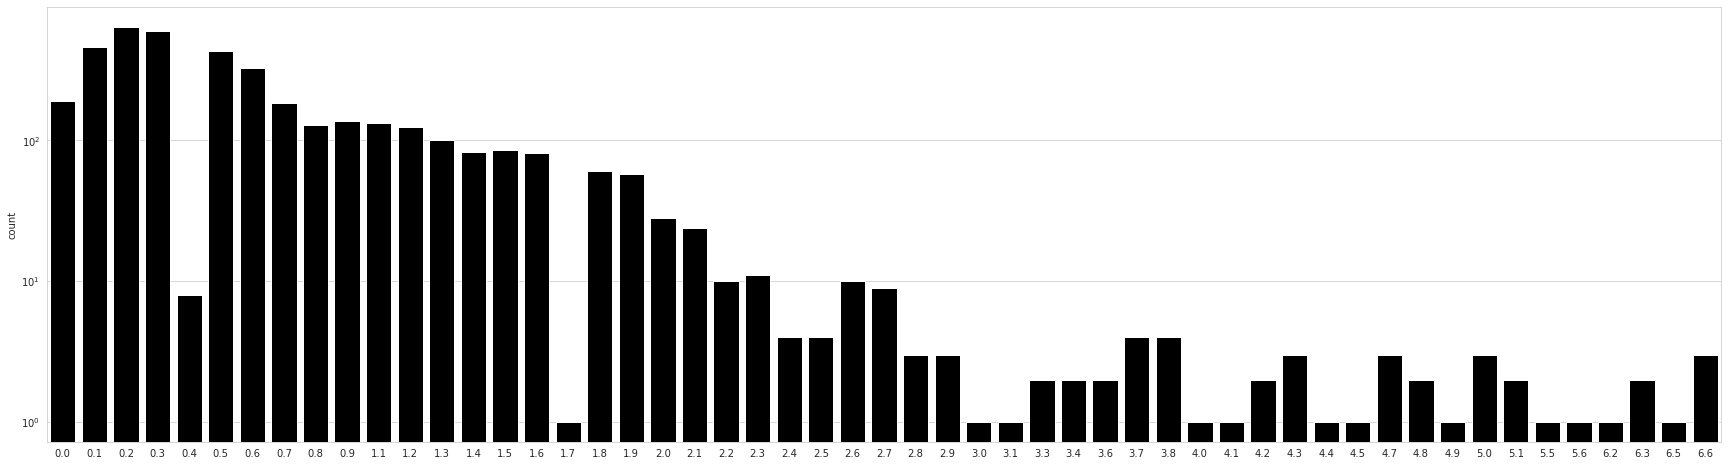

In [13]:
from matplotlib import rcParams
sns.set_style("whitegrid")
rcParams['figure.figsize'] = 30,8
sns.countplot(sorted(list(AluDict3.values())), log=True, color='black')

In [14]:
rb_df2['Divergence']=0.0
for x in rb_df2.index:
    if x in AluDict3.keys():
        rb_df2.at[x,'Divergence']=AluDict3[x]
    else:
        rb_df2.at[x,'Divergence']=100.0
rb_df2

,RepeatBlock,Lengths,Group,Block_Size,KMode_cluster,Divergence
Alu,,,,,,
C_AluY_1882515-1882806,0,2217,['45240 374 23.9 3.7 3.7 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1,2.1
C_AluY_1884937-1885225,0,2411,['45243 384 18.9 9.1 3.0 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1,2.2
C_AluY_1887352-1887643,0,2411,['45246 407 24.3 3.9 3.8 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1,2.7
C_AluY_1889761-1890048,0,2402,['45249 379 26.9 2.9 3.9 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1,2.2
C_AluY_1892175-1892463,0,2404,['45252 358 20.7 8.6 3.0 chrY.21-24.01.AMPL7-P...,2000-2999,#4169e1,2.9
...,...,...,...,...,...,...
+_AluSx_23141892-23142220,26,551,['63707 2114 13.0 0.7 0.0 chrY.21-24.01.AMPL7-...,<999,GraveYard,100.0
+_AluJb_23143348-23143498,26,1012,['63709 18 21.8 0.0 0.0 chrY.21-24.01.AMPL7-PA...,1000-1999,GraveYard,100.0
+_AluSp_23143499-23143796,26,298,['63711 2101 12.8 0.7 0.3 chrY.21-24.01.AMPL7-...,<999,GraveYard,100.0


In [15]:
#rb_df2.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01952/rb_df_Divergence.csv")

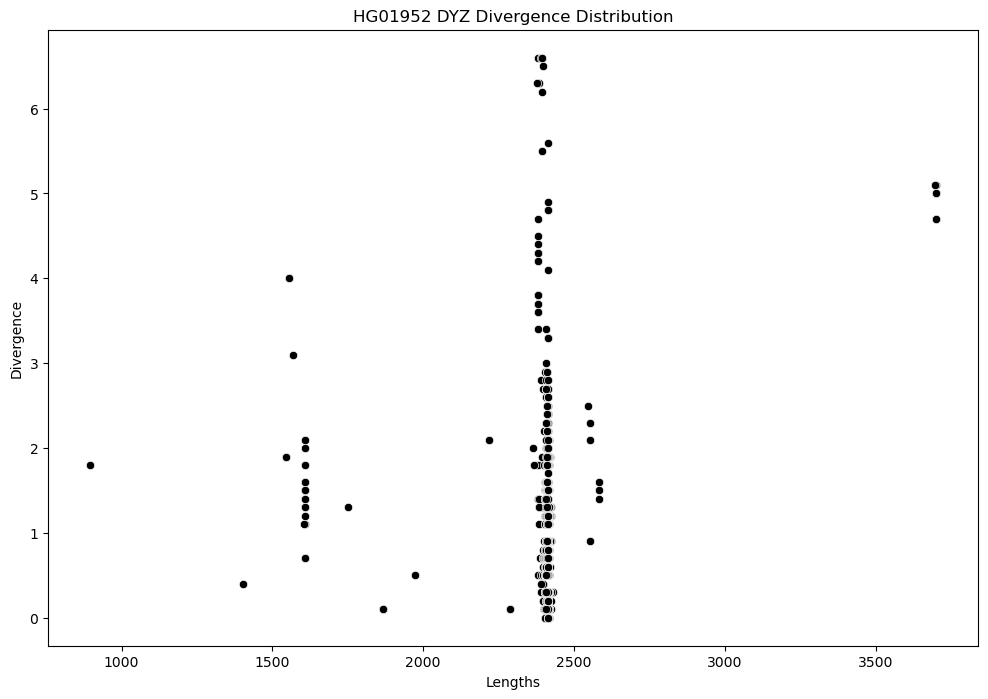

In [34]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 12,8
plt.title("HG01952 DYZ Divergence Distribution")
sns.scatterplot(x=rb_df2[(rb_df2['Divergence']!=100.0) & (rb_df2['KMode_cluster']!='GraveYard')]['Lengths'], y=rb_df2[(rb_df2['Divergence']<10.0) & (rb_df2['KMode_cluster']!='GraveYard')]['Divergence'], color='black')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG01952/HG01952_final_Divergence_Dots.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG01952/HG01952_final_Divergence_Dots.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [35]:
palette = {x:'temp' for x in set(rb_df2['Block_Size'])}
palette['1000-1999'] = 'Blue'
palette['2000-2999'] = 'Green'
palette['3000-3999'] = 'Red'
palette['<999'] = 'cyan'

[<matplotlib.collections.PathCollection object at 0x7f6b23485730>, <matplotlib.collections.PathCollection object at 0x7f6b24330520>, <matplotlib.collections.PathCollection object at 0x7f6b2374a760>, <matplotlib.collections.PathCollection object at 0x7f6b2374a130>]
['2000-2999', '1000-1999', '<999', '3000-3999']


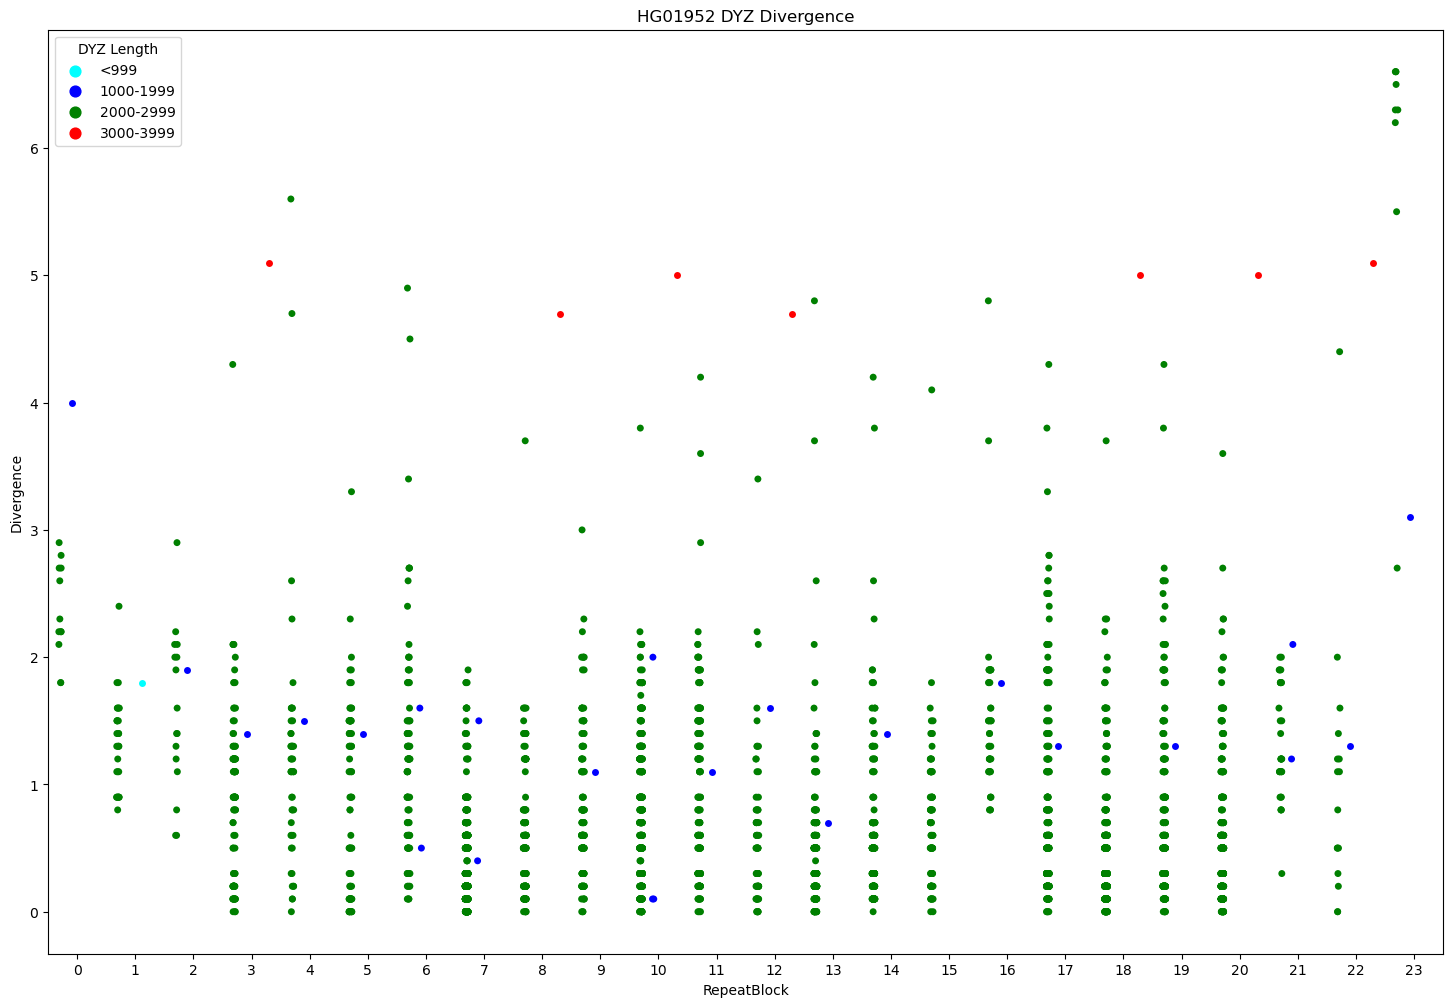

In [38]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 18,12
plt.title("HG01952 DYZ Divergence")
ax=sns.stripplot(x="RepeatBlock", y="Divergence", data=rb_df2[rb_df2['Divergence']!=100.0], dodge=True, hue='Block_Size' , palette=palette)
handles, labels = plt.gca().get_legend_handles_labels()
print(handles)
print(labels)
order = [2,1,0,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='DYZ Length')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG01952/HG01952_final_AluSubblock_Dots.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG01952/HG01952_final_AluSubblock_Dots.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
for key in AluDict2.keys():
    
    if float(rb_df2.at[key,'Divergence']) == 0.0:
        AluDict[key]='lightgrey'
                
    elif float(rb_df2.at[key,'Divergence']) > 0.0 and float(rb_df2.at[key,'Divergence']) <= 1.0:
        AluDict[key]='#538083' # Steel Teal
    
    elif float(rb_df2.at[key,'Divergence']) > 1.0 and float(rb_df2.at[key,'Divergence']) <= 2.0 :
        AluDict[key]='#2A7F62' #Spanish Viridian

    elif float(rb_df2.at[key,'Divergence']) > 2.0 and float(rb_df2.at[key,'Divergence']) <= 4.0 :
        AluDict[key]='#861657' #Pansy Purple
        
    elif float(rb_df2.at[key,'Divergence']) > 4.0 and float(rb_df2.at[key,'Divergence']) <=6.0 :
        AluDict[key]='#E1CE7A' #Flax
        
    elif float(rb_df2.at[key,'Divergence']) > 6.0 and float(rb_df2.at[key,'Divergence']) <=8.0 :
        AluDict[key]='#F06543' #orange soda

    elif float(rb_df2.at[key,'Divergence']) > 8.0 and float(rb_df2.at[key,'Divergence']) <100.0:
        AluDict[key]='#FF1053' #Radical Red

    else:
        print(key)
        AluDict[key]='black'

In [18]:
import collections
collections.Counter(AluDict.values())

Counter({'#861657': 97,
         '#2A7F62': 759,
         '#538083': 2936,
         'lightgrey': 191,
         '#E1CE7A': 21,
         '#FF1053': 3,
         '#F06543': 7,
         'black': 64})

## Drawing Blocks

In [19]:
import turtle

In [20]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
groupNames = sorted(set(rb_df2['RepeatBlock']))
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HG01952 Yq Heterochromatin Repeat Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(sorted(set(rb_df2['RepeatBlock']))):
    
    totalAlus = len(rb_df2[rb_df2['RepeatBlock']==key])
        
    turtle.color("black")
    turtle.forward(50)
    currentPosition = turtle.position()

    currentPosition = turtle.position()
    
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Repeat Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    for item in list(rb_df2[rb_df2['RepeatBlock']==key].index):
        
        if 'C_' in item:
            turtle.color(AluDict[item])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.right(90)
            turtle.forward(.5)

        
        elif '+_' in item:
            turtle.color(AluDict[item])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.left(90)
            turtle.forward(.5)

        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|███████████████████████████████████████████| 27/27 [08:14<00:00, 18.31s/it]


In [21]:
from PIL import Image

In [22]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [23]:
ts = turtle.getscreen()
save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/HG01952/HG01952_RM_DYZ_Divergence")

In [25]:
turtle.bye()

Terminator: 